<a href="https://colab.research.google.com/github/4deepprk/4deepprk.github.io/blob/master/DL109_CNNVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline
1. Using torchvision.datasets with a custom folder of images
2. Occlusion analysis with pretrained model
3. Filter visualisation with pretrained model

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

## Load dataset

In [3]:
!unzip data.zip # loading our own custom dataset (throguh !unzip (unix command)) 

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/imagenet/
  inflating: data/imagenet/.DS_Store  
   creating: __MACOSX/data/imagenet/
  inflating: __MACOSX/data/imagenet/._.DS_Store  
   creating: data/imagenet/1/
  inflating: data/imagenet/1/stethoscope823-1.JPEG  
   creating: __MACOSX/data/imagenet/1/
  inflating: __MACOSX/data/imagenet/1/._stethoscope823-1.JPEG  
  inflating: data/imagenet/1/harmonica593-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-1.JPEG  
  inflating: data/imagenet/1/dome538-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-1.JPEG  
  inflating: data/imagenet/1/harmonica593-3.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-3.JPEG  
  inflating: data/imagenet/1/dome538-2.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-2.JPEG  
  inflating: data/imagenet/1/harmonica593-2.JPEG  
  inflati

In [4]:
with open("data/imagenet_labels.txt") as f:
    classes = eval(f.read())

In [5]:
print(classes)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

In [6]:
# Transformation of the custom dataset to support and feed the network as input
# Composing several transformations

# But through transformation we do make the images not look like images (scaling off the values of the images)
transform = transforms.Compose([
    transforms.Resize(224), # resizing the images to 224 x 224 (inorder to match the convolution size of CNN)
    transforms.ToTensor(), # converting to tensor so as to make them workable with PyTorch
    # Normalize the image (mean of three channels of ImageNet), (standard deviation of three channels of ImageNet)
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

In [7]:
# dataset creation
# using torchvision datasets for custom dataset to do evaluation (not training)
evalset = torchvision.datasets.ImageFolder(root='./data/imagenet', transform=transform)

In [8]:
batch_size=1 # size of the batch

In [9]:
# data loader creation
evalloader = torch.utils.data.DataLoader(evalset, batch_size=batch_size, shuffle=True)

In [10]:
dataiter = iter(evalloader) # creating iterator (in this case we get one image as batch size = 1)
images, labels = dataiter.next() # next batch
# Here only one image for one batch
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([1, 3, 224, 224])
torch.Size([3, 224, 224])
0


## Load pretrained model

In [11]:
# Loading a pre-trained model to do some inference and visualization of the image
# Remember pretrained = True is nothing but the model is trained by using ImageNet dataset
# What we have as the dataset is a small part of the 100 GB ImageNet dataset

# For the purpose of visualization of the inner working of the model we are keeping
# the images in which the VGG16 is trained and the evaluation of the trained model
# are both coming from the same distribution

# This will download the trained model with the layers and the parameters
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [12]:
# Setting the model in the "Evaluation mode".
# Why? This evaluation mode ensures that certain things like dropouts(channel 
# which are used only during training phase and not during evaluation are 
# turned OFF)

model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Visualise image

In [13]:
def imshow(img, title): # It will take a particular image and its title and plot
    
    # Doing an inverse operation of mean and standard deviation to make the images look like the original
    # for visualization purpose
    
    # Inverse correction of standard deviation (for the transformation already done)
    std_correction = np.asarray([0.229, 0.224, 0.225]).reshape(3, 1, 1)
    
    # Inverse correction of mean (for the transformation already done)
    mean_correction = np.asarray([0.485, 0.456, 0.406]).reshape(3, 1, 1)
    
    # converting image from tensor to numpy and then multiply with standard deviation and sum with mean 
    # ie., NumPy broadcasting operation (3, 224, 244) * (3, 1, 1) as (3, 224, 244) where this
    # standard deviation numbers are multiplied across all numbers of the given 
    # channel [0.229, 0.224, 0.225]. 
    # (0.229 multiplied with all values which has 0 (first channel) in the first index across 224 x 224 values,
    # 0.224 multiplied with all values which has 1 (second channel) in the first index across 224 x 224 values, 
    # 0.225 multiplied with all values which has 2 (third channel) in the first index across 224 x 224 values)

    # ie., NumPy broadcasting operation (3, 224, 244) + (3, 1, 1) as (3, 224, 244) where this
    # mean numbers are multiplied across all numbers of the given 
    # channel [0.485, 0.456, 0.406]. 
    # (0.485 added with all values which has 0 (first channel) in the first index across 224 x 224 values,
    # 0.456 added with all values which has 1 (second channel) in the first index across 224 x 224 values, 
    # 0.406 added with all values which has 2 (third channel) in the first index across 224 x 224 values)
    
    npimg = np.multiply(img.numpy(), std_correction) + mean_correction # we do the operation in inverse (here first std and then mean)
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off') # turning OFF axis of the plot of the image
    # plt.imshow
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # numpy image (0, 1, 2) is transposed as (row, column, RGB channel)
    plt.title(title)
    plt.show()

In [14]:
def show_batch_images(dataloader):
    images, _ = next(iter(dataloader)) # getting one batch of image
    # Applying VGG16 on the images (doing inference or classification on the input image)
    # There is no softmax in the forward propogation (as this is an inference part 
    # and so we can take the larget value of the logits)
    outputs = model(images) #(output is a 1000 sized vector for each image)
    #("_" returns the maximum value of the 1000 sized vector and pred returns the the location number 
    # of the maximum value (which is the class itself))
    _, pred = torch.max(outputs.data, 1) # maximum of the output vector is taken along axis 1 
    print(_) # printss the maximum value after a linear combination at the output layer (logits) (no softmax required)
    print(pred) # prints the position of the maximum value or the class number or class id   
    img = torchvision.utils.make_grid(images) # bunch of images are stitched together to form broader image
    # As classes is a dictionary, x.item() returns the location number (class id or class number of a particular image)
    # and so classes[x.item()] returns the label or title of the image
    imshow(img, title=[classes[x.item()] for x in pred])
    
    return images, pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([14.7561])
tensor([538])


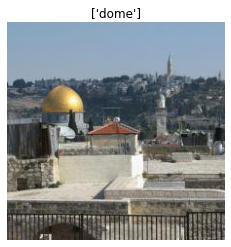

In [40]:
images, pred = show_batch_images(evalloader) # in this random given image the trained model has classified it as "dome" 

## Occlusion analysis

In [50]:
''' We are interested in finding out what is the probability that the image (before occlusion) is classified as "dome"?
That is, we are looking at the output layer and taking the softmax after the logits and printing
the probability of classification as "dome" in that softmax output'''

outputs = model(images) # calling the model on the images
print(outputs.shape) # 1000 classes in a single batch
# We use softmax in the forward propogation (as in this case we need to understand the probability
# of the given image being "dome" before occlusion analysis) 
outputs = nn.functional.softmax(outputs, dim=1) # softmax function is applied on the output
# prob_no_occ returns the probability value and pred returns the location of the probability value or predicted label
prob_no_occ, pred = torch.max(outputs.data, 1)  
prob_no_occ = prob_no_occ[0].item() # form tensor value to real value

# What we can observe here is without occlusion the probabilty of the given image is high which means 
# the classificaiton of the given image clearly classifies to the ground truth by using VGG16 pre-trained network

print(prob_no_occ) # prints the probability value of the given input image ("dome") in this case without occlusion
# print()
# print(pred)
# print(pred[0].item())
# print()
# print(prob_no_occ)

torch.Size([1, 1000])
0.7955080270767212


In [51]:
# This function takes in the VGG16 pre-trained model, the image without occlusion, label of the image,
# occlusion size, occlusion stride (occlusion size and stride are same so as to deal with no overlap in the cells and
# each cell calls VGG16 once and so the more fine grained them occlusion stride and size the more the time consumed for computation),
# occlusion pixel (delete a particular region in the image) 

def occlusion(model, image, label, occ_size=50, occ_stride=50, occ_pixel=0.5):
    # The importance of using negative indices is obvious because the width and
    # the height of the image does not change with repect to the negative indices
    # but the batch will change (as our choice leads to)
    # eg., torch.Size([1, 3, 224, 224]) -> batch, channel, width, height
    
    width, height = image.shape[-2], image.shape[-1] # [-2] is width and [-1] is height
    
    # output height and width calculation (just like convolution operation)
    # no padding here so we loose out some pixels at the edges
    output_height = int(np.ceil((height-occ_size)/occ_stride))
    output_width = int(np.ceil((width-occ_size)/occ_stride))
    
    heatmap = torch.zeros((output_height, output_width)) # declaring torch as zero tensor based on the output width and height
    
    # iterating through the height and width of the original image
    for h in range(0, height):
        for w in range(0, width):
            # computing co-ordinates of the actual image
            h_start = h*occ_stride 
            w_start = w*occ_stride
            h_end = min(height, h_start + occ_size)
            w_end = min(width, w_start + occ_size)
            
            if (w_end) >= width or (h_end) >= height: # ensuring not to go beyond the image
                continue
            
            input_image = image.clone().detach() # doing a deep copy the original image and detach
            # input_image[for all batches, for all channels, width start and end set to 0.5, height start and end set to 0.5]
            # we obtain 0.5 in the red, blue and green channels (so for that specific region we obtain a grey pattern)
            input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel # setting occlusion pixel to co-ordinates (part of the image) 
            
            output = model(input_image) # now we pass the occluded image to the model
            # now we pass the logits through the softmax operation to obtain the probability of the occluded image
            output = nn.functional.softmax(output, dim=1)
            prob = output.tolist()[0][label] # computing the probability of a specific class ("dome" is the one we are interested in)
            # finding out what is the probability of occluded image still being called "dome"            
            heatmap[h, w] = prob # setting the probability value at the particular occluded region 

    return heatmap

In [52]:
heatmap = occlusion(model, images, pred[0].item(), 32, 14) # over-writing the size and the stride of the occlusion

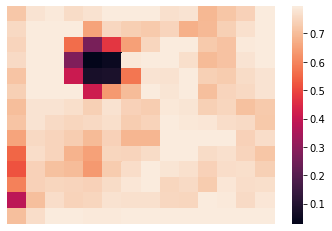

In [53]:
# heatmap plot of the input image shows the likelihood of whether the given image is dome
# greying out the pixels of the given image (by ocluding the image) we are interested in
# knowing the probability of the given image being "dome" after each deletion of the part of
# the image (deleting parts of the image now and then and understanding how well the image classifies
# as "dome")

imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ) # vmax is the max. value of probability without occlusion

# Darker the color the more effective is the occlusion (which means very less probability that the image given is classified as "dome")

## Filter visualisation

In [54]:
alexnet = models.alexnet(pretrained=True) # downloading the pre-trained AlexNet

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [55]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [56]:
def plot_filters_single_channel_big(t):
    
    # After merging everything into a single big matrix we find out the rows and columns
    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]
          
    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200)) # width, height
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='Greys', ax=ax, cbar=False)

In [57]:
def plot_filters_single_channel(t):
    
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    nrows = 1 + nplots//ncols
    
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    
    fig = plt.figure(figsize=(ncols, nrows))
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [58]:
def plot_filters_multi_channel(t): # t is the tensor weights
    
    num_kernels = t.shape[0] # number of output channels which is 64 images and t.shape[1] contains number of input channels
    
    num_cols = 12
    num_rows = num_kernels
    
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1) # #row, #column, index of current printing
        
        npimg = np.array(t[i].numpy(), np.float32) # converting input tensor into numpy and then to float image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg) # normalization
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.tight_layout()
    plt.show()

In [59]:
def plot_weights(model, layer_num, single_channel = True, collated = False):
    # AlexNet model (trained model)
    layer = model.features[layer_num] # accessing the feature layer in the sequential component
    if isinstance(layer, nn.Conv2d): # check whether the layer accessed in convolutional
    # .weight and .bias are parameters defined in PyTorch and tied to the sequential layers
    # model.features[layer_num].weight -> access the weight values and model.features[layer_num].bias -> access the bias value
    # .data -> gives the value, .grad -> gives the gradient value
        weight_tensor = model.features[layer_num].weight.data # accessing the weights and bias of the trained model or even while training the model
        if single_channel:
            if collated:
                plot_filters_single_channel_big(weight_tensor)
            else:
                plot_filters_single_channel(weight_tensor) # plotting single channel
        else:
            # only works if the tensor has only 3 input channel to work with
            if weight_tensor.shape[1] == 3: # the index 1 is 3 (three channels R, G, B) eg., torch.Size([1, 3, 224, 224]) 
                plot_filters_multi_channel(weight_tensor) # plotting mutli channel
            else:
                'Can only plot weights with three channels with single_channel = False'
    else:
        print('Can only visualise layers which are convolutional')

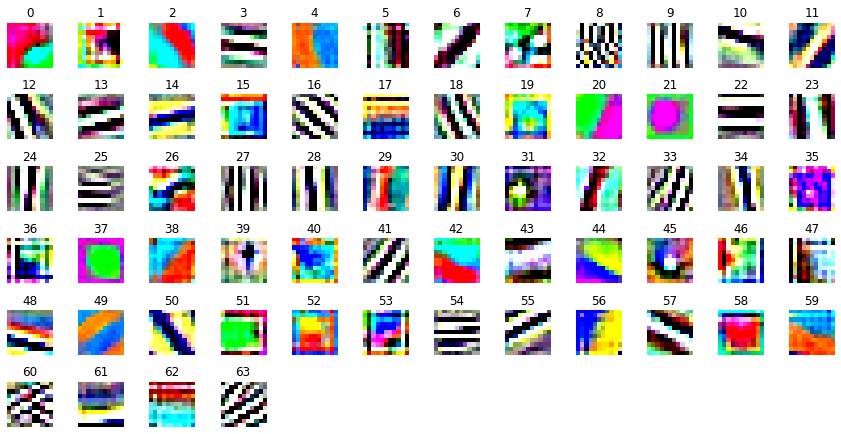

In [60]:
plot_weights(alexnet, 0, single_channel = False)

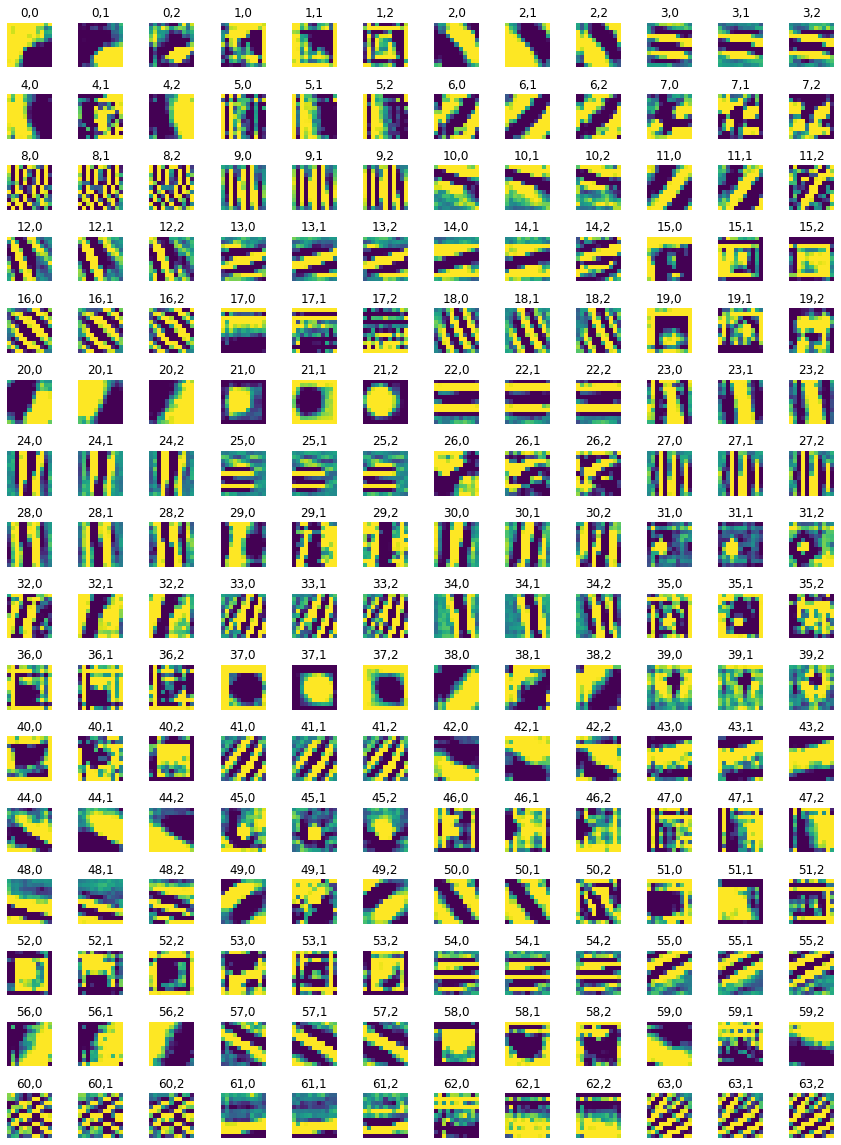

In [61]:
plot_weights(alexnet, 0, single_channel = True)

In [ ]:
plot_weights(alexnet, 3, single_channel = True)

In [ ]:
plot_weights(alexnet, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 3, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 6, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 2, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 5, single_channel = True, collated = True)